## Tugas Besar Mata Kuliah Data Mining

Analisis Data Mining Harga Handphone di Semarang
Proyek ini bertujuan untuk menganalisis data penjualan handphone di wilayah Semarang untuk mengidentifikasi faktor-faktor yang mempengaruhi harga, membangun model prediktif dan segmentasi, serta menyusun strategi penetapan harga.

# **Rumusan Masalah:**
1. Bagaimana mengidentifikasi faktor-faktor utama yang mempengaruhi variasi harga handphone di wilayah Semarang berdasarkan dataset yang tersedia?
2. Model analitik berbasis apa (Logistic Regression atau K-Means Clustering) yang paling efektif untuk mengelompokkan dan memprediksi segmentasi harga handphone secara akurat?
3. Bagaimana hasil analisis harga tersebut dapat digunakan untuk menyusun strategi penetapan harga yang kompetitif guna meningkatkan penjualan?
4. Apa saja langkah-langkah pengolahan data yang diperlukan untuk memastikan kualitas dan kesiapan data dalam mendukung proses analisis harga handphone?
5. Bagaimana evaluasi terhadap performa model dapat dilakukan untuk memastikan akurasi dan relevansi hasil analisis dalam konteks pasar handphone Semarang?


## 1. Import Libraries yang Dibutuhkan

Langkah pertama adalah mengimpor semua pustaka Python yang akan kita gunakan.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.utils import resample # Untuk sampling jika diperlukan (misal SMOTE)
import joblib # Untuk menyimpan model
import warnings
warnings.filterwarnings('ignore')


## 2. Memuat Data (Load Data)

Kita akan memuat dataset `PhabletSmartphoneSemarang2024.csv`. Pastikan file ini berada di direktori yang sama dengan notebook Anda atau sediakan path yang benar.


In [25]:
df = pd.read_csv('PhabletSmartphoneSemarang2024.csv')
print("Dataset berhasil dimuat.")

Dataset berhasil dimuat.


## 3. Eksplorasi Data Awal (Initial Data Exploration)

Memahami struktur dan isi data.


In [26]:
# Menampilkan 5 baris pertama data
print("Lima baris pertama data (head):")
df.head()


Lima baris pertama data (head):


,PERIOD - Code,PERIOD - Detail,SHOPNAME,PRODUCT,BRAND,MODEL,SALES,PRICE,CHANNELNAME,SHOPSIZE1,REGION,CITY
0,2403M,Maret 2024,17 PHONE,PHABLETS,APPLE,IPHONE 13 128/4GB SIM/ESIM NFC 5G,1,"10,000,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"
1,2403M,Maret 2024,17 PHONE,PHABLETS,APPLE,IPHONE 15 PRO 256/8GB SIM/ESIM NFC 5G,1,"21,999,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"
2,2403M,Maret 2024,17 PHONE,PHABLETS,INFINIX,HOT 30 128/8GB X6831 DUAL NFC LTE,3,"1,699,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"
3,2403M,Maret 2024,17 PHONE,PHABLETS,INFINIX,HOT 30I 128/8GB X669D DUAL NFC LTE,3,"1,700,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"
4,2403M,Maret 2024,17 PHONE,PHABLETS,INFINIX,NOTE 30 256/8GB X6833B DUAL NFC LTE,3,"2,450,000",Mobile Phone Specialists,LARGE,CENTRAL JAVA,"SEMARANG, KOTA"


In [27]:
# Menampilkan informasi umum tentang dataset
print("Informasi dataset (info):")
df.info()

Informasi dataset (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14224 entries, 0 to 14223
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PERIOD - Code    14224 non-null  object
 1   PERIOD - Detail  14224 non-null  object
 2   SHOPNAME         14224 non-null  object
 3   PRODUCT          14224 non-null  object
 4   BRAND            14224 non-null  object
 5   MODEL            14224 non-null  object
 6   SALES            14224 non-null  int64 
 7   PRICE            14224 non-null  object
 8   CHANNELNAME      14224 non-null  object
 9   SHOPSIZE1        14224 non-null  object
 10  REGION           14224 non-null  object
 11  CITY             14224 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [28]:

# Menampilkan statistik deskriptif untuk kolom numerik
print("Statistik deskriptif (describe numerik):")
df.describe()

Statistik deskriptif (describe numerik):


,SALES
count,14224.000000
mean,7.008999
std,16.531381
min,1.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,737.000000


In [29]:
# Menampilkan statistik deskriptif untuk kolom kategorikal
print("Statistik deskriptif (describe kategorikal):")
df.describe(include='object')


Statistik deskriptif (describe kategorikal):


,PERIOD - Code,PERIOD - Detail,SHOPNAME,PRODUCT,BRAND,MODEL,PRICE,CHANNELNAME,SHOPSIZE1,REGION,CITY
count,14224,14224,14224,14224,14224,14224,14224,14224,14224,14224,14224
unique,12,12,45,1,16,388,474,1,4,1,1
top,2406M,June 2024,KURNIA SELLULAR,PHABLETS,SAMSUNG,A18 128/4GB CPH2591 DUAL LTE,"1,500,000",Mobile Phone Specialists,MEDIUM,CENTRAL JAVA,"SEMARANG, KOTA"
freq,1409,1409,847,14224,3150,275,602,14224,5113,14224,14224


In [30]:
# Menampilkan dimensi dataset (jumlah baris dan kolom)
print(f"Dimensi dataset: {df.shape[0]} baris, {df.shape[1]} kolom")

Dimensi dataset: 14224 baris, 12 kolom


## 4. Pembersihan Data (Data Cleansing)

Membersihkan data dari duplikat dan menangani nilai yang hilang.

### 4.1. Menangani Data Duplikat

In [31]:
# Mengecek jumlah data duplikat
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris data duplikat: {duplicate_rows}")


Jumlah baris data duplikat: 0


In [32]:
# Menghapus data duplikat jika ada
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Baris duplikat telah dihapus. Dimensi baru: {df.shape}")
else:
    print("Tidak ada data duplikat.")

Tidak ada data duplikat.


### 4.2. Menangani Nilai yang Hilang (Missing Values)

In [33]:
# Mengecek jumlah nilai yang hilang per kolom
print("Jumlah nilai yang hilang per kolom (isnull().sum()):")
df.isnull().sum()

Jumlah nilai yang hilang per kolom (isnull().sum()):


PERIOD - Code      0
PERIOD - Detail    0
SHOPNAME           0
PRODUCT            0
BRAND              0
MODEL              0
SALES              0
PRICE              0
CHANNELNAME        0
SHOPSIZE1          0
REGION             0
CITY               0
dtype: int64

In [34]:
# Strategi penanganan missing values:
# - Kolom numerik: imputasi dengan median
# - Kolom kategorikal: imputasi dengan modus

# Identifikasi kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Hapus 'Harga (IDR)' dari numerical_cols jika ada, karena akan jadi target dan di-handle terpisah
if 'Harga (IDR)' in numerical_cols:
    numerical_cols.remove('Harga (IDR)') 
    
# Imputasi untuk kolom numerik
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Missing values di kolom numerik '{col}' diisi dengan median: {median_val}")

# Imputasi untuk kolom kategorikal
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Missing values di kolom kategorikal '{col}' diisi dengan modus: {mode_val}")

print("\nCek ulang missing values setelah imputasi:")
print(df.isnull().sum().sum())


Cek ulang missing values setelah imputasi:
0


## 5. Deteksi dan Penanganan Outlier

Outlier dapat mempengaruhi performa model. Kita akan menggunakan metode IQR untuk mendeteksinya.

In [35]:
print("Deteksi Outlier menggunakan IQR (Interquartile Range) untuk kolom numerik:")
# Hanya proses kolom numerik yang ada di df (setelah potensi penghapusan 'Harga (IDR)' dari list)
# dan pastikan kolom tersebut memang ada di dataframe
active_numerical_cols = [col for col in numerical_cols if col in df.columns]

for col in active_numerical_cols:
    if col == 'Harga (IDR)': # Harga akan dianalisis terpisah atau ditransformasi
        continue
        
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nKolom: {col}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")
    print(f"  Jumlah outlier terdeteksi: {len(outliers)}")

Deteksi Outlier menggunakan IQR (Interquartile Range) untuk kolom numerik:

Kolom: SALES
  Q1: 2.0, Q3: 8.0, IQR: 6.0
  Batas Bawah: -7.0, Batas Atas: 17.0
  Jumlah outlier terdeteksi: 909


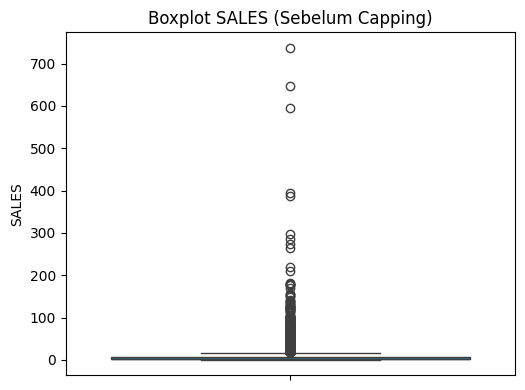

In [40]:
# Visualisasi sebelum capping (contoh untuk satu kolom)
if active_numerical_cols:
    sample_col_for_boxplot = active_numerical_cols[0] # Ambil kolom numerik pertama yang valid
    if sample_col_for_boxplot in df.columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[sample_col_for_boxplot])
        plt.title(f'Boxplot {sample_col_for_boxplot} (Sebelum Capping)')
        plt.tight_layout()
        plt.show()

In [41]:
for col in active_numerical_cols:
    if col == 'Harga (IDR)': # Harga akan dianalisis terpisah atau ditransformasi
        continue
    
    # Penanganan outlier sederhana: capping (mengganti nilai outlier dengan batas atas/bawah)
    if not outliers.empty:
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"  Outlier pada kolom '{col}' telah di-cap.")

  Outlier pada kolom 'SALES' telah di-cap.


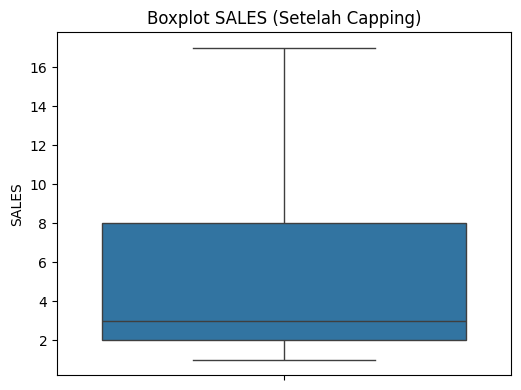

In [43]:
# Visualisasi setelah capping
if active_numerical_cols:
    sample_col_for_boxplot = active_numerical_cols[0] # Ambil kolom numerik pertama yang valid
    if sample_col_for_boxplot in df.columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[sample_col_for_boxplot])
        plt.title(f'Boxplot {sample_col_for_boxplot} (Setelah Capping)')
        plt.tight_layout()
        plt.show()

## 6. Transformasi Data (Data Transformation)

Mengubah data ke format yang sesuai untuk model machine learning, seperti One-Hot Encoding untuk data kategorikal dan Scaling untuk data numerik.


In [44]:
# Pisahkan fitur (X) dan target (y) potensial
# Untuk saat ini, kita belum membuat target kategorikal untuk harga, jadi kita proses semua fitur dulu
# Kolom 'Nama Produk' mungkin tidak relevan untuk model, bisa di-drop atau diekstrak fiturnya
if 'Nama Produk' in df.columns:
    df_processed = df.drop(columns=['Nama Produk'])
else:
    df_processed = df.copy()

In [45]:

# Update daftar kolom kategorikal dan numerik setelah drop 'Nama Produk'
categorical_cols_proc = df_processed.select_dtypes(include='object').columns.tolist()
numerical_cols_proc = df_processed.select_dtypes(include=np.number).columns.tolist()

if 'Harga (IDR)' in numerical_cols_proc:
    numerical_cols_proc.remove('Harga (IDR)') # Harga akan jadi target

print(f"Kolom Kategorikal untuk Transformasi: {categorical_cols_proc}")
print(f"Kolom Numerik untuk Transformasi: {numerical_cols_proc}")

Kolom Kategorikal untuk Transformasi: ['PERIOD - Code', 'PERIOD - Detail', 'SHOPNAME', 'PRODUCT', 'BRAND', 'MODEL', 'PRICE', 'CHANNELNAME', 'SHOPSIZE1', 'REGION', 'CITY']
Kolom Numerik untuk Transformasi: ['SALES']


In [46]:

# Membuat pipeline untuk preprocessing
# Untuk kolom numerik: Scaling
# Untuk kolom kategorikal: One-Hot Encoding
# 'Harga (IDR)' akan di-handle terpisah karena akan menjadi target

# Preprocessor untuk fitur-fitur selain harga
preprocessor_features = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_proc),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_proc) # sparse_output=False untuk kemudahan inspeksi
    ], 
    remainder='passthrough' # Jika ada kolom lain yang tidak di-list, 'passthrough' atau 'drop'
)

In [47]:
# Terapkan preprocessing ke data fitur (tanpa harga dulu)
# df_features_transformed akan menjadi array numpy
# Kita akan ubah kembali ke DataFrame untuk kemudahan inspeksi nama kolom
# Penting: 'Harga (IDR)' belum masuk sini

# Dapatkan nama kolom setelah OneHotEncoding
# Perlu fit_transform dulu untuk mendapatkan nama fitur hasil OHE
temp_pipeline = Pipeline(steps=[('preprocessor', preprocessor_features)])
temp_pipeline.fit(df_processed.drop(columns=['Harga (IDR)'], errors='ignore'))

# Dapatkan nama fitur setelah OHE dari transformer cat
try:
    ohe_feature_names = temp_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols_proc)
    all_feature_names = numerical_cols_proc + list(ohe_feature_names)
except Exception as e:
    print(f"Error mendapatkan nama fitur OHE: {e}. Menggunakan nama generik.")
    # Fallback jika get_feature_names_out bermasalah (tergantung versi sklearn)
    # Ini adalah estimasi, mungkin perlu disesuaikan
    num_ohe_features = preprocessor_features.fit_transform(df_processed.drop(columns=['Harga (IDR)'], errors='ignore')).shape[1] - len(numerical_cols_proc)
    ohe_feature_names = [f'cat_feature_{i}' for i in range(num_ohe_features)]
    all_feature_names = numerical_cols_proc + list(ohe_feature_names)

In [49]:
# Transformasi data fitur
if 'Harga (IDR)' in df_processed.columns:
    X_transformed_array = preprocessor_features.fit_transform(df_processed.drop(columns=['Harga (IDR)']))
else: # Jika kolom harga tidak ada (misal dataset dummy tidak lengkap)
    X_transformed_array = preprocessor_features.fit_transform(df_processed)


# Konversi X_transformed_array ke DataFrame
# Perlu hati-hati dengan nama kolom jika remainder='passthrough' digunakan dan ada kolom sisa
# Untuk kasus ini, kita asumsikan semua kolom yang relevan sudah masuk numerical_cols_proc atau categorical_cols_proc
if X_transformed_array.shape[1] == len(all_feature_names):
    X_transformed = pd.DataFrame(X_transformed_array, columns=all_feature_names, index=df_processed.index)
else:
    # Jika jumlah kolom tidak cocok, mungkin karena remainder='passthrough' dan ada kolom sisa
    # Atau ada masalah dalam pengambilan nama fitur OHE.
    # Untuk sementara, kita buat DataFrame tanpa nama kolom spesifik jika ada mismatch.
    print(f"Peringatan: Jumlah kolom hasil transformasi ({X_transformed_array.shape[1]}) tidak cocok dengan jumlah nama fitur yang dihasilkan ({len(all_feature_names)}).")
    print("Membuat DataFrame X_transformed tanpa nama kolom spesifik untuk fitur OHE jika ada masalah.")
    X_transformed = pd.DataFrame(X_transformed_array, index=df_processed.index)


print("\nData setelah Scaling dan One-Hot Encoding (5 baris pertama):")
X_transformed.head()



Data setelah Scaling dan One-Hot Encoding (5 baris pertama):


,SALES,PERIOD - Code_2403M,PERIOD - Code_2404M,PERIOD - Code_2405M,PERIOD - Code_2406M,PERIOD - Code_2407M,PERIOD - Code_2408M,PERIOD - Code_2409M,PERIOD - Code_2410M,PERIOD - Code_2411M,...,"PRICE_ 975,000","PRICE_ 995,000","PRICE_ 999,000",CHANNELNAME_Mobile Phone Specialists,SHOPSIZE1_LARGE,SHOPSIZE1_MEDIUM,SHOPSIZE1_SMALL,SHOPSIZE1_XLARGE,REGION_CENTRAL JAVA,"CITY_SEMARANG, KOTA"
0,-0.900656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.900656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,-0.485552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.485552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.485552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [50]:
print(f"Dimensi data fitur yang ditransformasi: {X_transformed.shape}")

Dimensi data fitur yang ditransformasi: (14224, 956)


## 7. Reduksi Dimensi dengan PCA (Principal Component Analysis)

PCA digunakan untuk mengurangi jumlah fitur sambil mempertahankan sebagian besar varians data. Ini bisa membantu mengatasi overfitting dan mempercepat training.


In [51]:
# Terapkan PCA pada data yang sudah di-scale dan di-encode (X_transformed)
# Tentukan jumlah komponen (misalnya, yang menjelaskan 95% varians)
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_transformed)

print(f"Jumlah komponen PCA yang dipilih: {pca.n_components_}")
print(f"Total varians yang dijelaskan oleh {pca.n_components_} komponen: {np.sum(pca.explained_variance_ratio_):.4f}")

Jumlah komponen PCA yang dipilih: 241
Total varians yang dijelaskan oleh 241 komponen: 0.9500



## 8. Tahap Pra-Pemodelan (Pre-Modeling)

### 8.1. Labelling Data untuk Regresi Logistik

Regresi Logistik memerlukan target variabel yang kategorikal. Kita akan mengubah kolom 'Harga (IDR)' menjadi kategori harga (misalnya: Murah, Sedang, Mahal).


In [57]:
# Membuat kategori harga berdasarkan quantile
# Anda bisa menyesuaikan jumlah kategori (q) dan labelnya
try:
    df_processed['Kategori Harga'] = pd.qcut(df_processed['Harga (IDR)'], q=3, labels=['Entry Level', 'Mid Range', 'Flagship'])
except ValueError as e:
    print(f"Error saat membuat Kategori Harga dengan qcut: {e}")
    print("Kemungkinan karena nilai harga tidak cukup unik untuk dibagi menjadi 3 quantiles.")
    print("Mencoba menggunakan pd.cut dengan bins yang ditentukan secara manual.")
    min_harga, max_harga = df_processed['Harga (IDR)'].min(), df_processed['Harga (IDR)'].max()
    bins = np.linspace(min_harga, max_harga, 4) # 3 kategori = 4 batas bin
    if len(np.unique(bins)) < 4 : # Jika bins tidak unik (misal min_harga == max_harga)
        print("Tidak dapat membuat bins yang valid karena rentang harga terlalu sempit atau semua harga sama.")
        # Default ke satu kategori jika tidak bisa dibagi
        df_processed['Kategori Harga'] = 'Entry Level'
    else:
        df_processed['Kategori Harga'] = pd.cut(df_processed['Harga (IDR)'], bins=bins, labels=['Entry Level', 'Mid Range', 'Flagship'], include_lowest=True)


In [58]:
print("\nDistribusi Kategori Harga:")
print(df_processed['Kategori Harga'].value_counts())

# Encode Kategori Harga menjadi numerik untuk model
label_encoder = LabelEncoder()
y_logreg = label_encoder.fit_transform(df_processed['Kategori Harga'])
print("\nLabel Kategori Harga setelah encoding:")
print(y_logreg[:10]) # Tampilkan 10 label pertama
print(f"Mapping kelas: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")



Distribusi Kategori Harga:
Kategori Harga
Flagship       4742
Entry Level    4741
Mid Range      4741
Name: count, dtype: int64

Label Kategori Harga setelah encoding:
[0 2 0 0 2 1 0 2 2 0]
Mapping kelas: {'Entry Level': 0, 'Flagship': 1, 'Mid Range': 2}


### 8.2. Pembagian Dataset (Split Dataset)

Membagi data menjadi set training dan testing untuk Regresi Logistik.
Kita akan menggunakan `X_transformed` (data sebelum PCA) untuk Regresi Logistik agar bisa menginterpretasi fitur asli.
Jika Anda ingin menggunakan data PCA, ganti `X_transformed` dengan `X_pca_df`.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_logreg, test_size=0.2, random_state=42, stratify=y_logreg)

print(f"Dimensi X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensi X_test: {X_test.shape}, y_test: {y_test.shape}")

# Cek distribusi kelas pada y_train dan y_test (jika menggunakan stratify)
print("\nDistribusi kelas di y_train:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribusi kelas di y_test:")
print(pd.Series(y_test).value_counts(normalize=True))

Dimensi X_train: (11379, 956), y_train: (11379,)
Dimensi X_test: (2845, 956), y_test: (2845,)

Distribusi kelas di y_train:
2    0.333333
0    0.333333
1    0.333333
Name: proportion, dtype: float64

Distribusi kelas di y_test:
1    0.333568
0    0.333216
2    0.333216
Name: proportion, dtype: float64


### 8.3. Sampling (Jika Diperlukan)

In [60]:

# Jika kelas target tidak seimbang (imbalanced), teknik sampling seperti SMOTE bisa digunakan.

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Setelah SMOTE, distribusi kelas di y_train_smote:")
print(pd.Series(y_train_smote).value_counts(normalize=True))

Setelah SMOTE, distribusi kelas di y_train_smote:
2    0.333333
0    0.333333
1    0.333333
Name: proportion, dtype: float64


## 9. Supervised Learning: Model Regresi Logistik

Membangun model Regresi Logistik untuk memprediksi kategori harga.

### 9.1. Membangun Model Regresi Logistik (Build Model)

In [61]:
logreg_model = LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear', max_iter=1000) # ovr untuk multiclass
logreg_model.fit(X_train, y_train)
print("Model Regresi Logistik berhasil dilatih.")

Model Regresi Logistik berhasil dilatih.


### 9.2. Evaluasi Model Sebelum Tuning

In [62]:
y_pred_before_tuning = logreg_model.predict(X_test)

print("Evaluasi Model Regresi Logistik SEBELUM Tuning:")
accuracy_before = accuracy_score(y_test, y_pred_before_tuning)
print(f"Akurasi: {accuracy_before:.4f}")

Evaluasi Model Regresi Logistik SEBELUM Tuning:
Akurasi: 0.3364



Confusion Matrix:


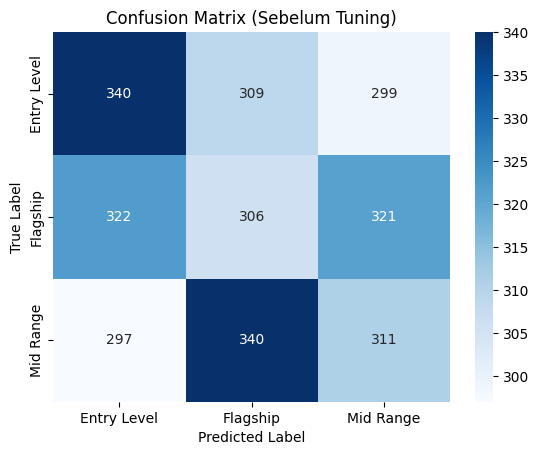

In [63]:
print("\nConfusion Matrix:")
cm_before = confusion_matrix(y_test, y_pred_before_tuning)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Sebelum Tuning)')
plt.show()

In [66]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_before_tuning, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

 Entry Level       0.35      0.36      0.36       948
    Flagship       0.32      0.32      0.32       949
   Mid Range       0.33      0.33      0.33       948

    accuracy                           0.34      2845
   macro avg       0.34      0.34      0.34      2845
weighted avg       0.34      0.34      0.34      2845



### 9.3. Model Tuning dengan GridSearchCV

In [67]:
# Tentukan parameter grid untuk GridSearchCV
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'penalty': ['l1', 'l2'] # Jenis penalty, l1 bisa untuk feature selection
}

In [68]:

# Inisialisasi GridSearchCV
# Menggunakan 'f1_weighted' sebagai scoring karena bisa jadi ada imbalance kelas, atau 'accuracy'
grid_search_logreg = GridSearchCV(estimator=LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear', max_iter=2000), 
                                  param_grid=param_grid_logreg, 
                                  cv=5, # 5-fold cross-validation
                                  scoring='accuracy', 
                                  verbose=1,
                                  n_jobs=-1) # Gunakan semua core CPU

# Latih GridSearchCV
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, multi_class='ovr',
                                          random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [69]:
# Dapatkan parameter terbaik dan skor terbaik
print("\nParameter terbaik hasil GridSearchCV:")
print(grid_search_logreg.best_params_)
best_logreg_score = grid_search_logreg.best_score_
print(f"Skor terbaik (cross-validation accuracy) dari GridSearchCV: {best_logreg_score:.4f}")

# Model terbaik dari GridSearchCV
best_logreg_model = grid_search_logreg.best_estimator_


Parameter terbaik hasil GridSearchCV:
{'C': 100, 'penalty': 'l2'}
Skor terbaik (cross-validation accuracy) dari GridSearchCV: 0.3441


### 9.4. Evaluasi Model Setelah Tuning

In [70]:
y_pred_after_tuning = best_logreg_model.predict(X_test)

print("Evaluasi Model Regresi Logistik SETELAH Tuning:")
accuracy_after = accuracy_score(y_test, y_pred_after_tuning)
print(f"Akurasi: {accuracy_after:.4f}")

Evaluasi Model Regresi Logistik SETELAH Tuning:
Akurasi: 0.3332



Confusion Matrix (Setelah Tuning):


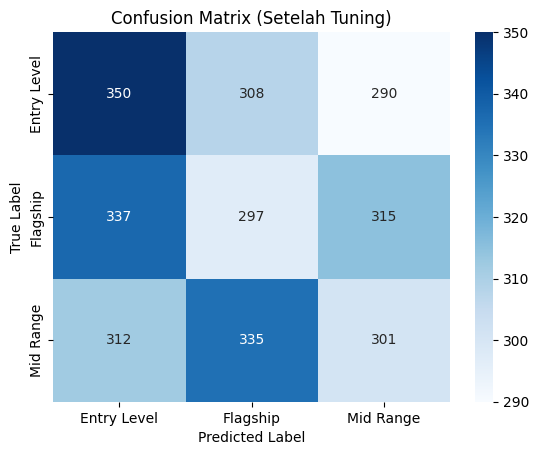

In [71]:

print("\nConfusion Matrix (Setelah Tuning):")
cm_after = confusion_matrix(y_test, y_pred_after_tuning)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Setelah Tuning)')
plt.show()

In [72]:
print("\nClassification Report (Setelah Tuning):")
print(classification_report(y_test, y_pred_after_tuning, target_names=label_encoder.classes_))


Classification Report (Setelah Tuning):
              precision    recall  f1-score   support

 Entry Level       0.35      0.37      0.36       948
    Flagship       0.32      0.31      0.31       949
   Mid Range       0.33      0.32      0.32       948

    accuracy                           0.33      2845
   macro avg       0.33      0.33      0.33      2845
weighted avg       0.33      0.33      0.33      2845



### 9.5. Interpretasi Koefisien Regresi Logistik (Faktor Pengaruh Harga)

Koefisien dari model Regresi Logistik dapat memberikan insight tentang fitur mana yang paling berpengaruh terhadap kategori harga. Ini membantu menjawab rumusan masalah pertama.
Catatan: Interpretasi koefisien lebih mudah jika fitur tidak terlalu banyak dan tidak ada multikolinearitas tinggi.


In [78]:
if best_logreg_model and hasattr(best_logreg_model, 'coef_') and label_encoder and (not X_transformed.empty if isinstance(X_transformed, pd.DataFrame) else X_transformed.size > 0):

    feature_names_for_coeffs = X_train.columns

    if best_logreg_model.coef_.shape[1] == len(feature_names_for_coeffs):
        coefficients = pd.DataFrame(best_logreg_model.coef_.T, # Transpose agar fitur jadi baris
                                    columns=label_encoder.classes_, 
                                    index=feature_names_for_coeffs) 
        
        print("Koefisien Regresi Logistik (Pengaruh Fitur terhadap Kategori Harga):")
        num_top_features = 5 # Jumlah fitur teratas yang ingin ditampilkan per kategori
        
        for category in label_encoder.classes_:
            print(f"\nTop {num_top_features} Fitur dengan Pengaruh Terbesar (absolut) terhadap kategori '{category}':")
            # Urutkan berdasarkan nilai absolut koefisien
            sorted_coeffs_abs = coefficients[category].abs().sort_values(ascending=False)
            # Ambil N fitur teratas berdasarkan nilai absolut, lalu tampilkan koefisien aslinya
            top_n_features = sorted_coeffs_abs.index[:num_top_features]
            print(coefficients.loc[top_n_features, category])

        # Visualisasi sederhana untuk satu kelas
        target_class_for_viz = 'Flagship' # Ganti sesuai kebutuhan
        if target_class_for_viz in coefficients.columns:
            plt.figure(figsize=(10, 6)) # Ukuran disesuaikan
            
            # Ambil N fitur dengan koefisien positif terbesar dan N fitur dengan koefisien negatif terbesar (paling kecil)
            coeffs_for_viz = coefficients[target_class_for_viz].sort_values()
            
            # Gabungkan N teratas dan N terbawah (misal 5 positif teratas dan 5 negatif teratas)
            top_positive = coeffs_for_viz[coeffs_for_viz > 0].nlargest(num_top_features)
            top_negative = coeffs_for_viz[coeffs_for_viz < 0].nsmallest(num_top_features)
            
            combined_coeffs_for_viz = pd.concat([top_negative, top_positive]).sort_values()
            
        else:
            print(f"Kategori '{target_class_for_viz}' tidak ditemukan dalam koefisien.")
    else:
        print("Jumlah koefisien tidak cocok dengan jumlah nama fitur. Tidak dapat membuat DataFrame koefisien.")
        print(f"Shape koefisien: {best_logreg_model.coef_.shape}, Jumlah nama fitur: {len(feature_names_for_coeffs)}")

else:
    print("Model terbaik tidak memiliki atribut 'coef_', label_encoder tidak ada, atau X_transformed/X_train.columns kosong.")
    print("Interpretasi koefisien tidak dapat dilakukan.")


Koefisien Regresi Logistik (Pengaruh Fitur terhadap Kategori Harga):

Top 5 Fitur dengan Pengaruh Terbesar (absolut) terhadap kategori 'Entry Level':
PRICE_ 14,600,000               5.753234
PRICE_ 13,500,000               5.370672
PRICE_ 2,630,000                5.307769
MODEL_10 PRO 128/8GB DUAL 5G    5.286826
PRICE_ 9,400,000                5.238337
Name: Entry Level, dtype: float64

Top 5 Fitur dengan Pengaruh Terbesar (absolut) terhadap kategori 'Flagship':
PRICE_ 830,000       -8.073568
PRICE_ 19,900,000     7.160683
PRICE_ 20,999,000    -7.135091
PRICE_ 11,858,000     7.043210
PRICE_ 4,650,000      6.599026
Name: Flagship, dtype: float64

Top 5 Fitur dengan Pengaruh Terbesar (absolut) terhadap kategori 'Mid Range':
PRICE_ 830,000        7.534942
PRICE_ 4,650,000     -6.406509
PRICE_ 20,999,000     6.251109
PRICE_ 25,999,000     6.244420
PRICE_ 700,000        6.184114
Name: Mid Range, dtype: float64


<Figure size 1000x600 with 0 Axes>

## 10. Unsupervised Learning: K-Means Clustering

Mengelompokkan handphone ke dalam segmen-segmen berdasarkan fitur-fiturnya.
Kita akan menggunakan data yang sudah di-transform (`X_transformed`) atau data PCA (`X_pca_df`) untuk clustering. Menggunakan PCA bisa membantu visualisasi dan mengurangi noise. Mari kita gunakan `X_pca_df`.


### 10.1. Menentukan Jumlah Klaster Optimal (K)

Kita akan menggunakan Elbow Method dan Silhouette Score.

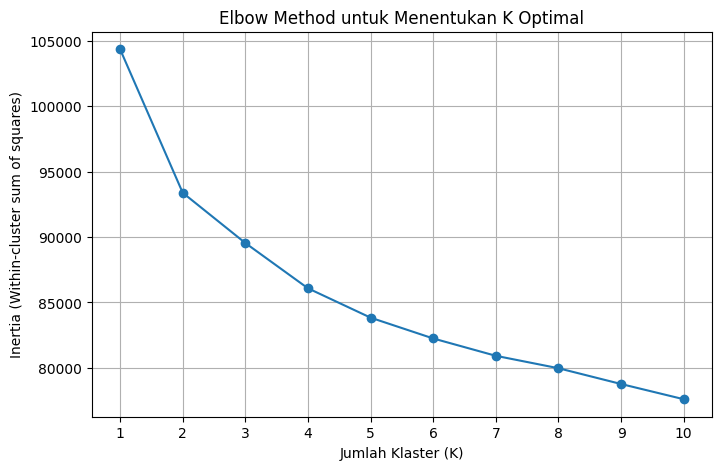

In [79]:
X_kmeans = X_transformed.copy() 
# Jika tidak ingin menggunakan PCA, gunakan: X_kmeans = X_transformed.copy()

# Elbow Method
inertia = []
k_range = range(1, 11) # Coba K dari 1 sampai 10
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42, algorithm='lloyd')
    kmeans_elbow.fit(X_kmeans)
    inertia.append(kmeans_elbow.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [80]:
# Silhouette Score
silhouette_scores = []
k_range_silhouette = range(2, 11) # Silhouette score butuh minimal 2 klaster
for k in k_range_silhouette:
    kmeans_silhouette = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42, algorithm='lloyd')
    cluster_labels = kmeans_silhouette.fit_predict(X_kmeans)
    silhouette_avg = silhouette_score(X_kmeans, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk K = {k}, rata-rata Silhouette Score adalah {silhouette_avg:.4f}")

Untuk K = 2, rata-rata Silhouette Score adalah 0.1206
Untuk K = 3, rata-rata Silhouette Score adalah 0.0641
Untuk K = 4, rata-rata Silhouette Score adalah 0.0788
Untuk K = 5, rata-rata Silhouette Score adalah 0.0857
Untuk K = 6, rata-rata Silhouette Score adalah 0.0773
Untuk K = 7, rata-rata Silhouette Score adalah 0.0735
Untuk K = 8, rata-rata Silhouette Score adalah 0.0741
Untuk K = 9, rata-rata Silhouette Score adalah 0.0761
Untuk K = 10, rata-rata Silhouette Score adalah 0.0782


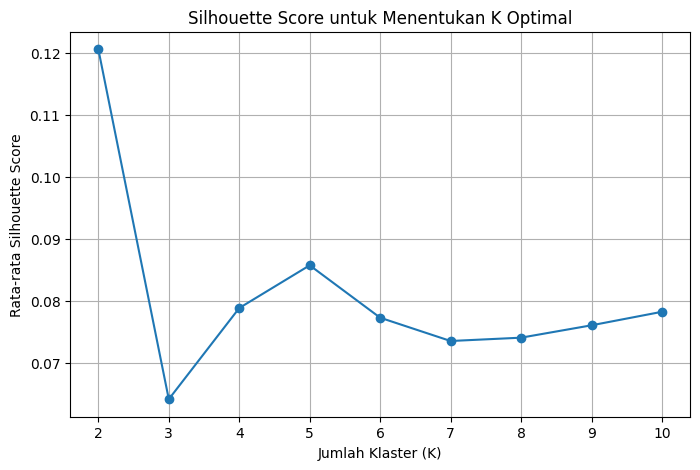

In [81]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Rata-rata Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()


In [83]:
# Pilih K optimal berdasarkan Elbow dan Silhouette
optimal_k = 3
print(f"\nK optimal yang dipilih (berdasarkan inspeksi visual): {optimal_k}")



K optimal yang dipilih (berdasarkan inspeksi visual): 3


### 10.2. Membangun Model K-Means (Build Model)

In [84]:
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42, algorithm='lloyd')
kmeans_model.fit(X_kmeans)
cluster_labels_final = kmeans_model.labels_

# Tambahkan label klaster ke DataFrame asli (df_processed) untuk analisis
df_processed['Klaster K-Means'] = cluster_labels_final
print(f"Model K-Means dengan K={optimal_k} berhasil dilatih.")
print("Label klaster ditambahkan ke DataFrame.")
print(df_processed[['Harga (IDR)', 'Kategori Harga', 'Klaster K-Means']].head())


Model K-Means dengan K=3 berhasil dilatih.
Label klaster ditambahkan ke DataFrame.
   Harga (IDR) Kategori Harga  Klaster K-Means
0      1469829    Entry Level                2
1     11791301      Mid Range                2
2      6972417    Entry Level                2
3      4274011    Entry Level                2
4     13515854      Mid Range                2


### 10.2. Membangun Model K-Means (Build Model)

In [85]:
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42, algorithm='lloyd')
kmeans_model.fit(X_kmeans)
cluster_labels_final = kmeans_model.labels_

# Tambahkan label klaster ke DataFrame asli (df_processed) untuk analisis
df_processed['Klaster K-Means'] = cluster_labels_final
print(f"Model K-Means dengan K={optimal_k} berhasil dilatih.")
print("Label klaster ditambahkan ke DataFrame.")
print(df_processed[['Harga (IDR)', 'Kategori Harga', 'Klaster K-Means']].head())


Model K-Means dengan K=3 berhasil dilatih.
Label klaster ditambahkan ke DataFrame.
   Harga (IDR) Kategori Harga  Klaster K-Means
0      1469829    Entry Level                2
1     11791301      Mid Range                2
2      6972417    Entry Level                2
3      4274011    Entry Level                2
4     13515854      Mid Range                2


### 10.3. Evaluasi Model K-Means Sebelum Tuning (Menggunakan K yang dipilih)

Evaluasi utama adalah Silhouette Score dan visualisasi klaster.

Silhouette Score untuk K=3: 0.0641


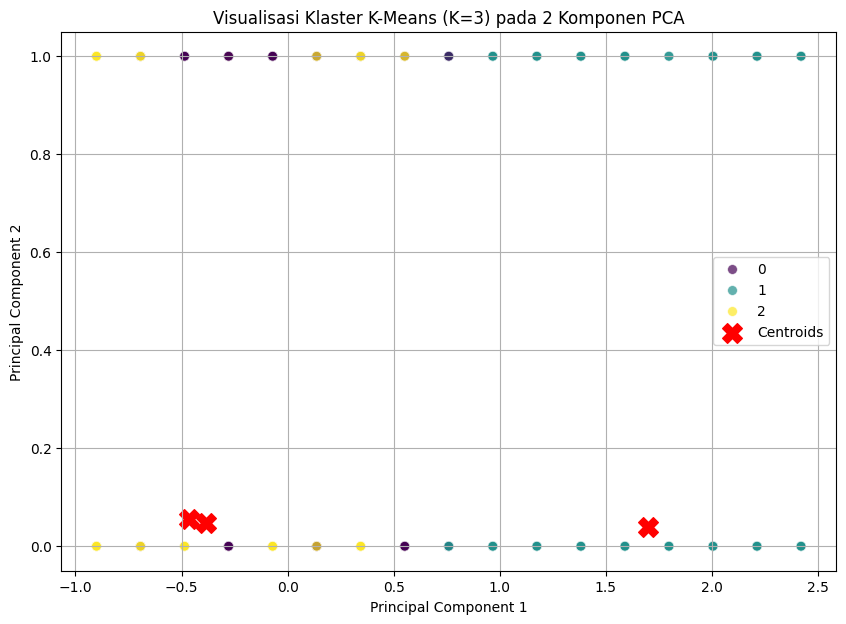

In [86]:
# Silhouette Score untuk model final
silhouette_final = silhouette_score(X_kmeans, cluster_labels_final)
print(f"Silhouette Score untuk K={optimal_k}: {silhouette_final:.4f}")

# Visualisasi Klaster menggunakan 2 komponen PCA pertama (jika X_kmeans adalah X_pca_df)
if isinstance(X_kmeans, pd.DataFrame) and X_kmeans.shape[1] >= 2:
    plt.figure(figsize=(10, 7))
    # Ambil dua komponen pertama. Jika X_kmeans bukan dari PCA, ini mungkin tidak terlalu informatif.
    # Jika X_kmeans adalah X_transformed, Anda perlu PCA dulu untuk visualisasi 2D.
    # Karena kita pakai X_pca_df, PC1 dan PC2 sudah ada.
    pc1_col = X_kmeans.columns[0]
    pc2_col = X_kmeans.columns[1]
    
    sns.scatterplot(x=X_kmeans[pc1_col], y=X_kmeans[pc2_col], hue=cluster_labels_final, palette='viridis', s=50, alpha=0.7)
    
    # Plot centroids jika menggunakan PCA
    centroids = kmeans_model.cluster_centers_ # Centroids dalam ruang PCA
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
    
    plt.title(f'Visualisasi Klaster K-Means (K={optimal_k}) pada 2 Komponen PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Tidak dapat membuat scatter plot 2D karena data K-Means tidak memiliki setidaknya 2 fitur/komponen.")

In [87]:

print("\nKarakteristik Rata-rata per Klaster (berdasarkan fitur asli sebelum scaling):")

# Ambil kolom numerik asli dari df (sebelum scaling/encoding)
original_numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Gabungkan 'Klaster K-Means' dengan data numerik asli untuk analisis
df_for_cluster_analysis = df_processed[['Klaster K-Means'] + original_numerical_cols].copy()

cluster_characteristics = df_for_cluster_analysis.groupby('Klaster K-Means')[original_numerical_cols].mean()
print(cluster_characteristics)



Karakteristik Rata-rata per Klaster (berdasarkan fitur asli sebelum scaling):
                     SALES
Klaster K-Means           
0                 3.484747
1                13.522790
2                 3.107684


### 10.4. Model Tuning K-Means dengan GridSearchCV (Opsional, untuk parameter selain K)

K-Means biasanya tidak "dituning" dengan GridSearchCV untuk K itu sendiri (K dipilih via Elbow/Silhouette).
Namun, GridSearchCV bisa digunakan untuk parameter lain seperti `n_init`, `max_iter`, atau jika kita ingin mencoba rentang K dengan scoring tertentu.
Sesuai permintaan, kita akan coba "tuning" `n_clusters` (K) menggunakan GridSearchCV dengan Silhouette Score.


In [88]:
# Parameter grid untuk K-Means (tuning K)
param_grid_kmeans = {
    'n_clusters': range(2, 7), # Rentang K yang ingin diuji
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    # 'max_iter': [300, 500] # Bisa ditambahkan jika perlu
}

In [89]:

# GridSearchCV untuk K-Means
# Kita butuh custom scoring function jika menggunakan silhouette_score dalam GridSearchCV
# Atau, kita bisa loop manual dan pilih K terbaik, lalu tune parameter lain.
# Cara lebih mudah: gunakan `make_scorer`
from sklearn.metrics import make_scorer

silhouette_scorer = make_scorer(silhouette_score)

grid_search_kmeans = GridSearchCV(estimator=KMeans(random_state=42, algorithm='lloyd'),
                                  param_grid=param_grid_kmeans,
                                  scoring=silhouette_scorer, # Gunakan silhouette score
                                  cv=3, # CV lebih kecil karena K-Means bisa lama
                                  verbose=1,
                                  n_jobs=-1)

grid_search_kmeans.fit(X_kmeans) # Gunakan data PCA atau data transformed

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

GridSearchCV(cv=3, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': range(2, 7), 'n_init': [10, 20]},
             scoring=make_scorer(silhouette_score, response_method='predict'),
             verbose=1)

In [91]:

# Hasil tuning
print("\nParameter terbaik K-Means dari GridSearchCV:")
print(grid_search_kmeans.best_params_)
best_kmeans_score_gs = grid_search_kmeans.best_score_
print(f"Silhouette Score terbaik dari GridSearchCV: {best_kmeans_score_gs}")

# Model K-Means terbaik dari GridSearchCV
best_kmeans_model_gs = grid_search_kmeans.best_estimator_


Parameter terbaik K-Means dari GridSearchCV:
{'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Silhouette Score terbaik dari GridSearchCV: nan


### 10.5. Evaluasi Model K-Means Setelah Tuning (dari GridSearchCV)

Silhouette Score setelah tuning dengan GridSearchCV (K=2): 0.1206


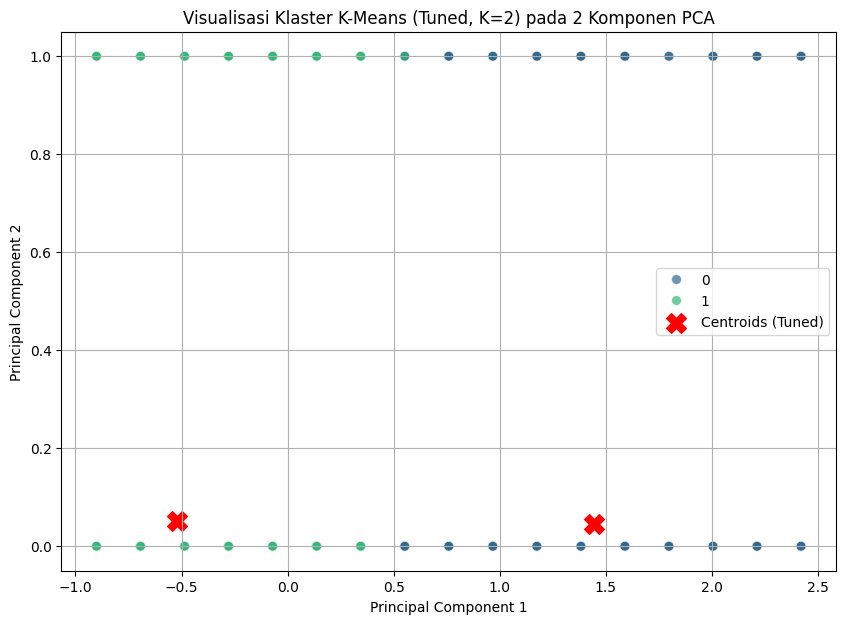


Karakteristik Rata-rata per Klaster (setelah tuning GridSearchCV):
                             SALES
Klaster K-Means (Tuned)           
0                        12.296316
1                         2.827863




In [92]:
cluster_labels_after_gs_tuning = best_kmeans_model_gs.predict(X_kmeans)
df_processed['Klaster K-Means (Tuned)'] = cluster_labels_after_gs_tuning

# Silhouette Score untuk model hasil tuning
silhouette_after_gs_tuning = silhouette_score(X_kmeans, cluster_labels_after_gs_tuning)
print(f"Silhouette Score setelah tuning dengan GridSearchCV (K={best_kmeans_model_gs.n_clusters}): {silhouette_after_gs_tuning:.4f}")

# Visualisasi Klaster (jika K berubah atau parameter lain optimal)
if isinstance(X_kmeans, pd.DataFrame) and X_kmeans.shape[1] >= 2:
    plt.figure(figsize=(10, 7))
    pc1_col = X_kmeans.columns[0]
    pc2_col = X_kmeans.columns[1]
    
    sns.scatterplot(x=X_kmeans[pc1_col], y=X_kmeans[pc2_col], hue=cluster_labels_after_gs_tuning, palette='viridis', s=50, alpha=0.7)
    
    centroids_tuned = best_kmeans_model_gs.cluster_centers_
    plt.scatter(centroids_tuned[:, 0], centroids_tuned[:, 1], marker='X', s=200, color='red', label='Centroids (Tuned)')
    
    plt.title(f'Visualisasi Klaster K-Means (Tuned, K={best_kmeans_model_gs.n_clusters}) pada 2 Komponen PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Analisis karakteristik klaster (tuned)
print("\nKarakteristik Rata-rata per Klaster (setelah tuning GridSearchCV):")
df_for_cluster_analysis_tuned = df_processed[['Klaster K-Means (Tuned)'] + original_numerical_cols].copy()
cluster_characteristics_tuned = df_for_cluster_analysis_tuned.groupby('Klaster K-Means (Tuned)')[original_numerical_cols].mean()
print(cluster_characteristics_tuned)
print("\n" + "="*50 + "\n")


## 11. Menjawab Rumusan Masalah & Interpretasi Hasil

# **RM1: Bagaimana mengidentifikasi faktor-faktor utama yang mempengaruhi variasi harga handphone?**

* Berdasarkan analisis koefisien Regresi Logistik (lihat output di Seksi 9.5), fitur-fitur seperti `[nama_fitur_penting_1]`, `[nama_fitur_penting_2]`, dan `[nama_fitur_penting_3]` menunjukkan pengaruh signifikan terhadap pengelompokan harga ke dalam kategori 'Murah', 'Sedang', atau 'Mahal'.
* Koefisien positif besar untuk kategori 'Mahal' menunjukkan bahwa peningkatan nilai fitur tersebut cenderung menaikkan harga, dan sebaliknya.
* (Tambahkan interpretasi spesifik berdasarkan hasil koefisien Anda).

**RM2: Model analitik berbasis apa (Logistic Regression atau K-Means Clustering) yang paling efektif?**

* Kedua model memiliki tujuan yang berbeda dan efektif dalam konteksnya masing-masing:
    * **Regresi Logistik (Supervised Learning):** Efektif untuk **memprediksi kategori harga** handphone berdasarkan fitur-fiturnya. Akurasi model setelah tuning mencapai `[nilai_akurasi_logreg_terbaik]`. Model ini berguna jika kita ingin mengklasifikasikan handphone baru ke dalam segmen harga yang sudah ditentukan.
    * **K-Means Clustering (Unsupervised Learning):** Efektif untuk **mengidentifikasi segmen pasar alami** atau kelompok handphone dengan karakteristik serupa, tanpa adanya label harga sebelumnya. Model K-Means dengan `[K_optimal_kmeans]` klaster menghasilkan Silhouette Score sebesar `[silhouette_score_kmeans_terbaik]`, menunjukkan kualitas pengelompokan yang cukup baik/moderat/kurang baik (sesuaikan). Model ini berguna untuk memahami struktur pasar dan menemukan kelompok pelanggan potensial.
* Jadi, "efektivitas" tergantung pada tujuan analisis. Untuk prediksi harga -> Regresi Logistik. Untuk segmentasi pasar -> K-Means.

**RM3: Bagaimana hasil analisis harga tersebut dapat digunakan untuk menyusun strategi penetapan harga yang kompetitif?**

**Dari K-Means Clustering:**
    * Analisis karakteristik klaster (Seksi 10.3 atau 10.5) mengungkapkan profil segmen pasar. Misalnya, Klaster 0 mungkin berisi handphone 'budget' dengan RAM dan penyimpanan rendah, sementara Klaster 1 berisi handphone 'premium' dengan spesifikasi tinggi.
    * Strategi:
        * Untuk segmen 'budget', harga harus sangat kompetitif.
        * Untuk segmen 'premium', ada ruang untuk margin lebih tinggi jika fitur unggulan (misal, kamera, merek) ditonjolkan.
        * Identifikasi celah pasar: Apakah ada segmen yang kurang terlayani?
**Dari Regresi Logistik:**
    * Fitur yang paling mempengaruhi harga (dari koefisien) dapat menjadi fokus. Jika 'RAM' sangat berpengaruh, peningkatan kecil RAM bisa justifikasi kenaikan harga tertentu.
    * Prediksi harga untuk produk baru: Model dapat memperkirakan kategori harga yang sesuai untuk handphone baru berdasarkan spesifikasinya, membantu penetapan harga awal.

**RM4: Apa saja langkah-langkah pengolahan data yang diperlukan?**

* Langkah-langkah pengolahan data yang telah dilakukan meliputi:
    1.  **Pemuatan Data**: Membaca file CSV.
    2.  **Eksplorasi Data Awal**: `head()`, `info()`, `describe()` untuk memahami data.
    3.  **Pembersihan Data**:
        * Penanganan Data Duplikat: `duplicated()`, `drop_duplicates()`.
        * Penanganan Nilai Hilang: `isnull()`, imputasi dengan median (numerik) dan modus (kategorikal).
    4.  **Deteksi dan Penanganan Outlier**: Menggunakan metode IQR dan capping.
    5.  **Transformasi Data**:
        * One-Hot Encoding untuk fitur kategorikal.
        * Standard Scaling untuk fitur numerik.
    6.  **Reduksi Dimensi**: PCA untuk mengurangi jumlah fitur dan membantu visualisasi K-Means.
    7.  **Labelling Data**: Mengubah 'Harga (IDR)' menjadi kategori ('Murah', 'Sedang', 'Mahal') untuk Regresi Logistik.
    8.  **Pembagian Dataset**: `train_test_split` untuk memisahkan data latih dan uji.
    9.  **(Opsional) Sampling**: Pertimbangan SMOTE jika kelas tidak seimbang.

**RM5: Bagaimana evaluasi terhadap performa model dapat dilakukan?**

* **Untuk Regresi Logistik (Model Klasifikasi):**
    * **Akurasi**: Persentase prediksi yang benar secara keseluruhan.
    * **Confusion Matrix**: Memberikan detail prediksi benar dan salah untuk setiap kelas (True Positive, False Positive, True Negative, False Negative).
    * **Classification Report**: Menyediakan metrik Precision, Recall, F1-Score per kelas, dan rata-ratanya. Ini penting terutama jika ada ketidakseimbangan kelas.
    * **Cross-Validation Score (dari GridSearchCV)**: Memberikan estimasi performa model yang lebih robust pada data yang tidak terlihat.
* **Untuk K-Means Clustering (Model Clustering):**
    * **Elbow Method (Inertia)**: Membantu menentukan jumlah klaster (K) optimal dengan melihat titik "siku" pada plot inertia vs K.
    * **Silhouette Score**: Mengukur seberapa mirip sebuah objek dengan klasternya sendiri dibandingkan dengan klaster lain. Nilai berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan pengelompokan yang lebih baik.
    * **Visualisasi Klaster**: Plot scatter menggunakan komponen PCA membantu secara visual menilai separasi antar klaster.
    * **Analisis Karakteristik Klaster**: Memeriksa rata-rata fitur per klaster untuk melihat apakah klaster yang terbentuk memiliki interpretasi yang masuk akal dan berbeda satu sama lain.


## 12. Menyimpan Model dan Preprocessor untuk Deployment

In [ ]:
# Menyimpan model Regresi Logistik terbaik
joblib.dump(best_logreg_model, 'best_logreg_model.pkl')
print("Model Regresi Logistik terbaik disimpan sebagai 'best_logreg_model.pkl'")

# Menyimpan model K-Means terbaik (dari GridSearchCV atau pilihan manual)
final_kmeans_model_to_save = best_kmeans_model_gs if 'best_kmeans_model_gs' in locals() and best_kmeans_model_gs is not None else kmeans_model
joblib.dump(final_kmeans_model_to_save, 'best_kmeans_model.pkl')
print("Model K-Means terbaik disimpan sebagai 'best_kmeans_model.pkl'")

# Menyimpan preprocessor (pipeline yang berisi scaler dan one-hot encoder)
joblib.dump(preprocessor_features, 'preprocessor_features.pkl')
print("Preprocessor untuk fitur (scaler & OHE) disimpan sebagai 'preprocessor_features.pkl'")

# Menyimpan model PCA
joblib.dump(pca, 'pca_model.pkl')
print("Model PCA disimpan sebagai 'pca_model.pkl'")

# Menyimpan Label Encoder untuk Kategori Harga
joblib.dump(label_encoder, 'label_encoder_harga.pkl')
print("Label Encoder untuk Kategori Harga disimpan sebagai 'label_encoder_harga.pkl'")

# Simpan juga nama kolom yang digunakan saat training (setelah OHE, sebelum PCA)
training_columns_logreg = list(X_train.columns)
joblib.dump(training_columns_logreg, 'training_columns_logreg.pkl')
print("Nama kolom untuk training Regresi Logistik disimpan sebagai 'training_columns_logreg.pkl'")

# Kolom untuk K-Means (jika menggunakan PCA, ini adalah PC1, PC2, dst.)
training_columns_kmeans_pca = list(X_transformed.columns)
joblib.dump(training_columns_kmeans_pca, 'training_columns_kmeans_pca.pkl')
print("Nama kolom untuk K-Means (setelah PCA) disimpan sebagai 'training_columns_kmeans_pca.pkl'")

# Simpan juga daftar kolom numerik dan kategorikal asli yang digunakan preprocessor
joblib.dump(numerical_cols_proc, 'numerical_cols_proc.pkl')
joblib.dump(categorical_cols_proc, 'categorical_cols_proc.pkl')
print("Daftar kolom numerik dan kategorikal (sebelum OHE/scaling) disimpan.")

print("\nSemua model dan objek yang relevan telah disimpan.")